In [1]:
import torch
from collections import defaultdict
import sys
import os
from PIL import Image
import json, cv2, math
import numpy as np
import argparse
from tqdm import tqdm
import cv2, base64

/root/anaconda3/envs/disco_jsh/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def tsv_reader(tsv_file, sep='\t'):
    with open(tsv_file, 'r') as fp:
        for i, line in enumerate(fp):
            yield [x.strip() for x in line.split(sep)]


In [10]:
dataset_root = '.'
tsv_fname_img = dataset_root + '/toy_dataset/tsv/train_images.tsv'
tsv_fname_msk = dataset_root + '/toy_dataset/tsv/train_masks.tsv'
tsv_fname_pose = dataset_root + '/toy_dataset/tsv/train_poses.tsv'
tsv_fname_img = '/HOME/HOME/jisihui/VITON-hd-resized/train/tsv/train_img.tsv'
tsv_fname_msk = '/HOME/HOME/jisihui/VITON-hd-resized/train/tsv/train_img_mask.tsv'
tsv_fname_pose = '/HOME/HOME/jisihui/VITON-hd-resized/train/tsv/train_cloth.tsv'
tsv_fname_smpl = '/HOME/HOME/jisihui/VITON-hd-resized/train/tsv/train_smpl.tsv'
tsv_fname_cloth_msk = '/HOME/HOME/jisihui/VITON-hd-resized/train/tsv/train_cloth_mask.tsv'
tsv_img = tsv_reader(tsv_fname_img)
tsv_msk = tsv_reader(tsv_fname_msk)
tsv_pose = tsv_reader(tsv_fname_pose)
tsv_smpl = tsv_reader(tsv_fname_smpl)
tsv_cloth_msk = tsv_reader(tsv_fname_cloth_msk)



In [18]:
item = next(tsv_img)
img_key = item[0]
image = cv2.imdecode(np.frombuffer(base64.b64decode(item[1]), np.uint8),cv2.IMREAD_COLOR)


item = next(tsv_msk)
msk_key = item[0]
mask = cv2.imdecode(np.frombuffer(base64.b64decode(item[1]), np.uint8),cv2.IMREAD_COLOR)

item = next(tsv_pose)
pose_key = item[0]
pose = cv2.imdecode(np.frombuffer(base64.b64decode(item[1]), np.uint8),cv2.IMREAD_COLOR)

item = next(tsv_smpl)
smpl_key = item[0]
smpl = cv2.imdecode(np.frombuffer(base64.b64decode(item[1]), np.uint8),cv2.IMREAD_COLOR)

item = next(tsv_cloth_msk)
cloth_msk_key = item[0]
cloth_msk = cv2.imdecode(np.frombuffer(base64.b64decode(item[1]), np.uint8),cv2.IMREAD_COLOR)

In [6]:
print('image shape:', image.shape)
print('mask shape:', mask.shape)
print('pose shape:', pose.shape)
print('smpl shape:', smpl.shape)

image shape: (1024, 768, 3)
mask shape: (1024, 768, 3)
pose shape: (1024, 768, 3)
smpl shape: (1024, 768, 3)


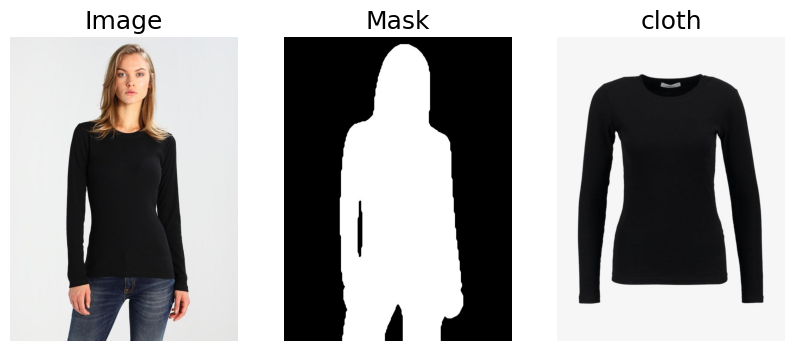

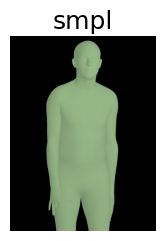

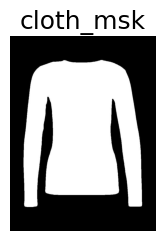

In [19]:
# display
from PIL import Image
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

plt.subplot(1,3,1)
plt.axis('off')
plt.title('Image',fontsize=18)
plt.imshow(image[:,:,::-1])

plt.subplot(1,3,2)
plt.axis('off')
plt.title('Mask',fontsize=18)
plt.imshow(mask[:,:,::-1])

plt.subplot(1,3,3)
plt.axis('off')
plt.title('cloth',fontsize=18)
plt.imshow(pose[:,:,::-1])


plt.subplot(1,3,1)
plt.axis('off')
plt.title('smpl',fontsize=18)
plt.imshow(smpl[:,:,::-1])


plt.subplot(1,3,2)
plt.axis('off')
plt.title('cloth_msk',fontsize=18)
plt.imshow(cloth_msk[:,:,::-1])
plt.show()

(1024, 768)


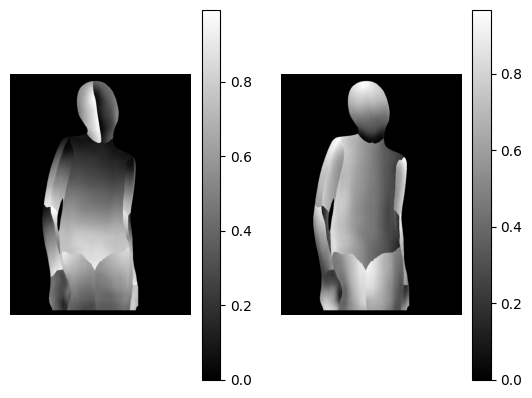

In [9]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
tensor_transforms = transforms.Compose(
    [
        transforms.Normalize([0.5], [0.5]),
    ]
)
imSize = (512, 640)
h, w = imSize[1], imSize[0]
# dp_path = '/home/nfs/jsh/DreamPose/demo/sample/poses/demo/sample/poses/frame_50_densepose.npy'
dp_path = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00006_00.jpg.npy'
# from IPython import embed; embed()
data0 = np.load(dp_path)[0]
data1 = np.load(dp_path)[1]
print(data0.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data0, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data1,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()



(2, 1024, 768)
(2, 1024, 768)
(2, 1024, 768)
(1024, 768)


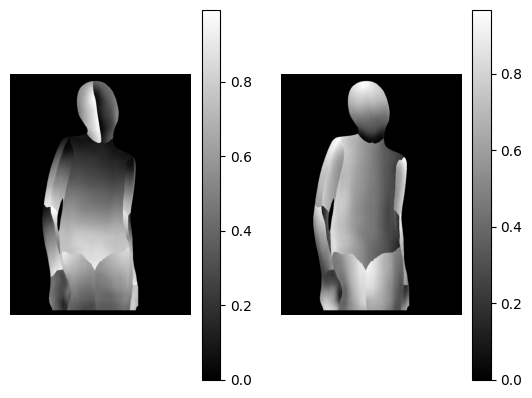

(1024, 768)


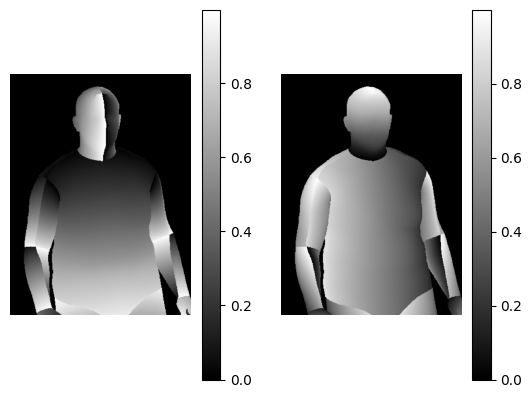

(1024, 768)


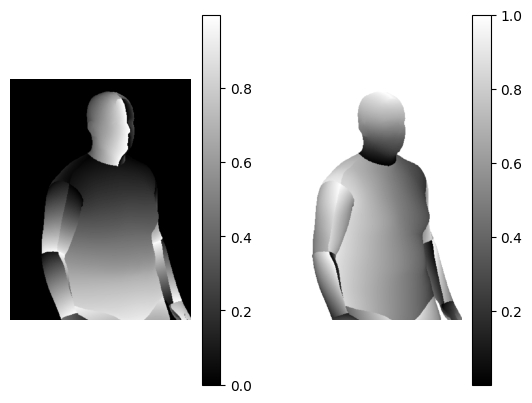

(1024, 768)


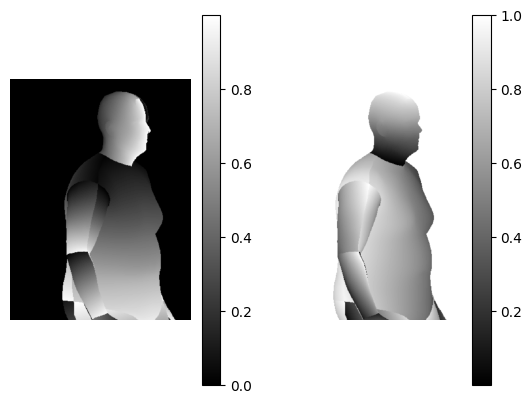

In [4]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
tensor_transforms = transforms.Compose(
    [
        transforms.Normalize([0.5], [0.5]),
    ]
)
imSize = (512, 640)
h, w = imSize[1], imSize[0]
dp_path = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00006_00.jpg.npy'
dp_path0 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/iuv1.npy'
dp_path2 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/iuv1_45.npy'
dp_path1 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/iuv1_22_5.npy'
# from IPython import embed; embed()
data00 = np.load(dp_path)[0, :, :]
data01 = np.load(dp_path)[1, :, :]

data1 = np.load(dp_path0)
data1[1][data1[1] != 0] = 1 - data1[1][data1[1] != 0]
print(data1.shape)
np.save(dp_path0, data1)
data10 = np.load(dp_path0)[ 0, :, :]
data11 = np.load(dp_path0)[ 1, :, :]

data2 = np.load(dp_path1)[0, :, :]
data3 = 1-np.load(dp_path1)[1, :, :]
data10 = np.load(dp_path0)[ 0, :, :]
data11 = np.load(dp_path0)[ 1, :, :]
data11[data11 != 0] = 1 - data11[data11 != 0]
data1=np.array([data10,data11])
print(data1.shape)

data4 = np.load(dp_path2)[0, :, :]
data5 = 1-np.load(dp_path2)[1, :, :]
data10 = np.load(dp_path0)[ 0, :, :]
data11 = np.load(dp_path0)[ 1, :, :]
data11[data11 != 0] = 1 - data11[data11 != 0]
data1=np.array([data10,data11])
print(data1.shape)

print(data00.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data00, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data01,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

print(data10.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data10, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data11,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

print(data2.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data2, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data3,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

print(data4.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data4, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data5,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

/root/anaconda3/envs/disco_jsh/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(2, 1024, 768)
(1024, 768)


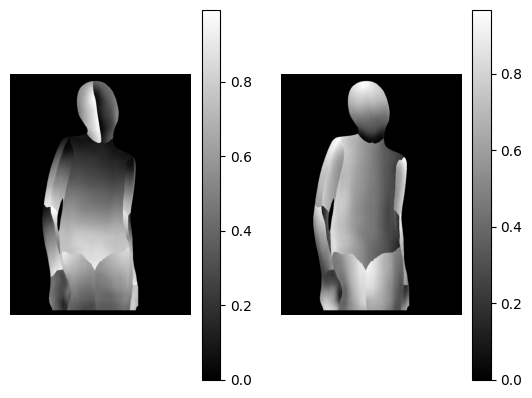

NameError: name 'data0' is not defined

In [1]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
tensor_transforms = transforms.Compose(
    [
        transforms.Normalize([0.5], [0.5]),
    ]
)
imSize = (512, 640)
h, w = imSize[1], imSize[0]
dp_path = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00006_00.jpg.npy'
dp_path0 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/iuv1.npy'
dp_path2 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/iuv1_45.npy'
dp_path1 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/iuv1_22_5.npy'
# from IPython import embed; embed()
data00 = np.load(dp_path)[0, :, :]
data01 = np.load(dp_path)[1, :, :]
# data1 = np.load(dp_path0)
data10 = np.load(dp_path0)[ 0, :, :]
data11 = np.load(dp_path0)[ 1, :, :]
data11[data11 != 0] = 1 - data11[data11 != 0]
data1=np.array([data10,data11])
print(data1.shape)
np.save('/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/iuv1.npy', data1)

data2 = np.load(dp_path1)[0, :, :]
data3 = 1-np.load(dp_path1)[1, :, :]
data4 = np.load(dp_path2)[0, :, :]
data5 = 1-np.load(dp_path2)[1, :, :]

print(data00.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data00, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data01,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

print(data10.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data10, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data11,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

print(data2.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data2, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data3,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

print(data4.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data4, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data5,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

(2, 1024, 768)
(1024, 768)


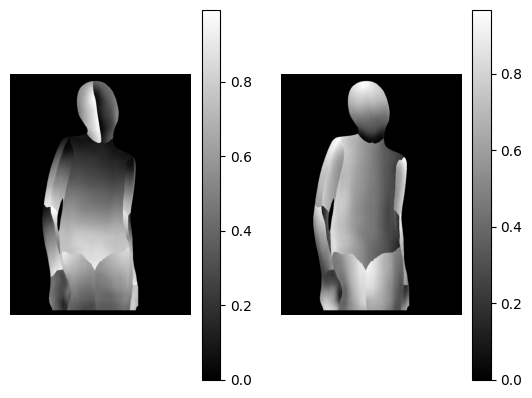

(1024, 768)


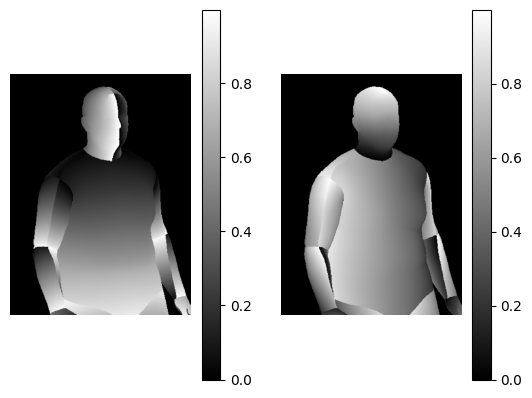

In [2]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
tensor_transforms = transforms.Compose(
    [
        transforms.Normalize([0.5], [0.5]),
    ]
)
imSize = (512, 640)
h, w = imSize[1], imSize[0]
dp_path = '/HOME/HOME/jisihui/VITON-hd-resized/try/densepose/00006_00.jpg.npy'
dp_path0 = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my/range/iuv1_13.5.npy'

# from IPython import embed; embed()
data00 = np.load(dp_path)[0, :, :]
data01 = np.load(dp_path)[1, :, :]

data1 = np.load(dp_path0)
# data1[1][data1[1] != 0] = 1 - data1[1][data1[1] != 0]
print(data1.shape)
# np.save(dp_path0, data1)
data10 = np.load(dp_path0)[ 0, :, :]
data11 = np.load(dp_path0)[ 1, :, :]


print(data00.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data00, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data01,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()

print(data10.shape)
plt.subplot(1,2,1)
plt.axis('off')
# 绘制图像
plt.imshow(data10, cmap='gray')
# 添加颜色条
plt.colorbar()

plt.subplot(1,2,2)
plt.axis('off')
# 绘制图像
plt.imshow(data11,cmap='gray')
# 添加颜色条
plt.colorbar()
plt.show()


['/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_0.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_1.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_2.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_3.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_4.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_5.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_6.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_7.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_8.npy', '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4/iuv_9.npy']
(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)


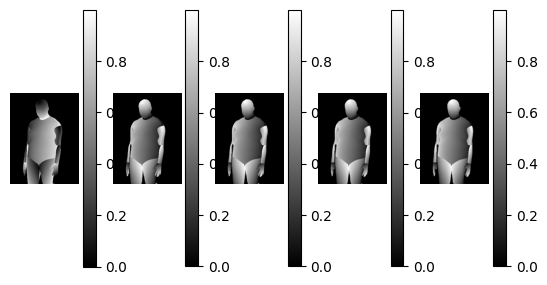

(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)
(1024, 768)


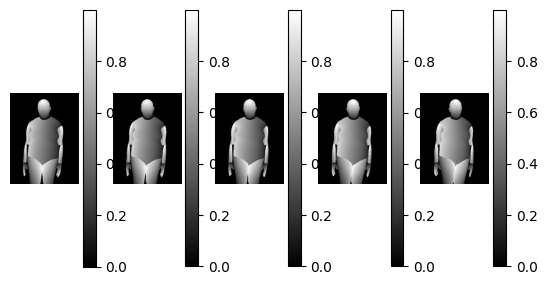

In [13]:
from torchvision import transforms
import os
import torch
import torch.nn.functional as F
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

folder_path = '/home/nfs/jsh/HierarchicalProbabilistic3DHuman/output/my4'
file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.npy')]
file_paths.sort()
print(file_paths)
# from IPython import embed; embed()
for i in range(5):
    path_i = file_paths[i]
    data0 = np.load(path_i)[0, :, :]
    data1 = np.load(path_i)[1, :, :]

    print(data1.shape)
    plt.subplot(1,5,i+1)
    plt.axis('off')
    # 绘制图像
    plt.imshow(data1, cmap='gray')
    # 添加颜色条
    plt.colorbar()
plt.show()
for i in range(5,10):
    path_i = file_paths[i]
    data0 = np.load(path_i)[0, :, :]
    data1 = np.load(path_i)[1, :, :]

    print(data1.shape)
    plt.subplot(1,5,i-4)
    plt.axis('off')
    # 绘制图像
    plt.imshow(data1, cmap='gray')
    # 添加颜色条
    plt.colorbar()
plt.show()

# plt.subplot(1,2,2)
# plt.axis('off')
# # 绘制图像
# plt.imshow(data01,cmap='gray')
# # 添加颜色条
# plt.colorbar()

